Rez inputs:   [1.53352356, 1.551121593, 1.610574007, 1.516911745, 1.540246725]
Rez outputs:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


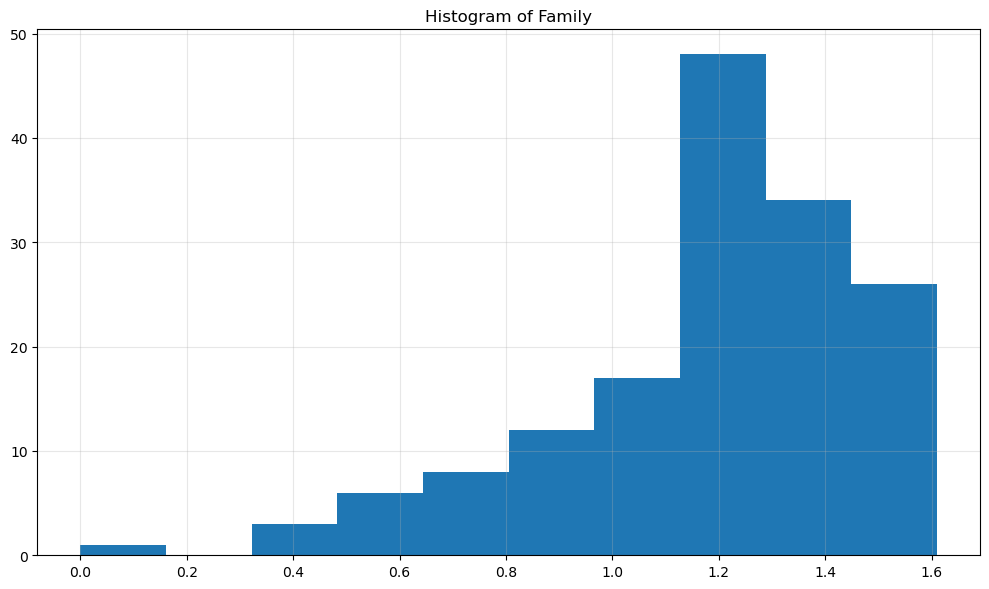

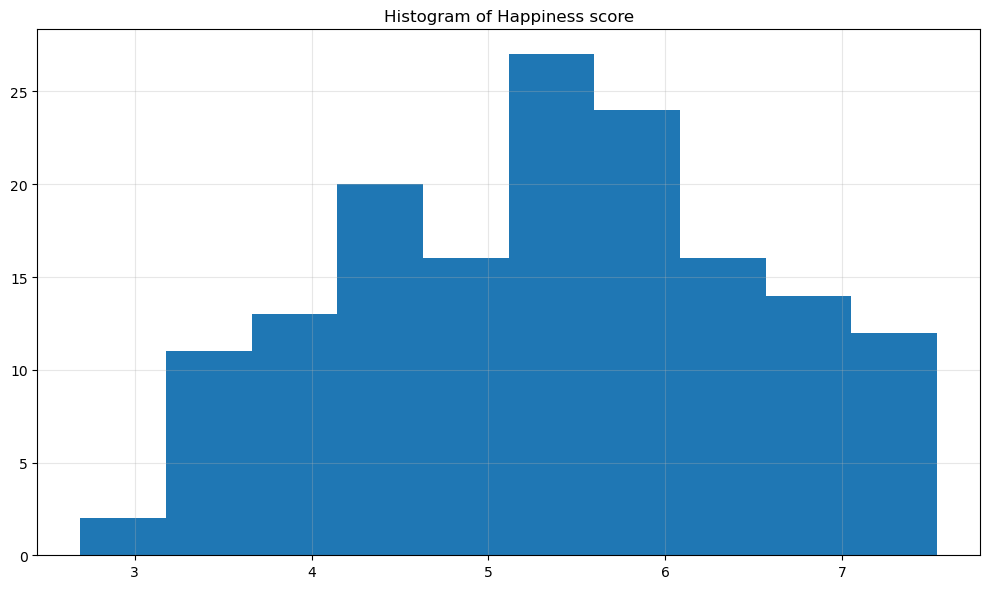

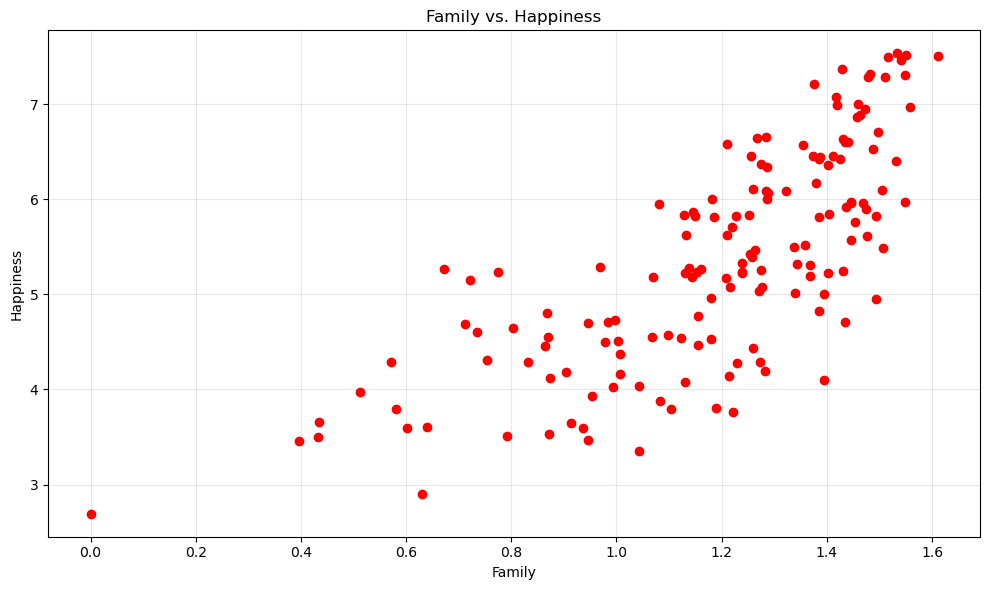

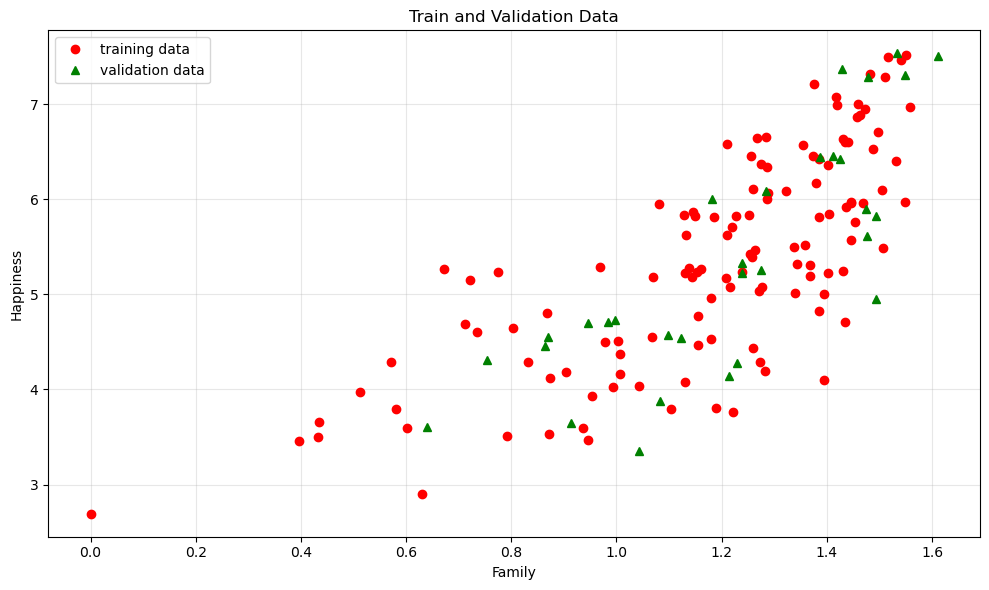

The learned model: f(x) = 2.0390 + 2.8049 * x


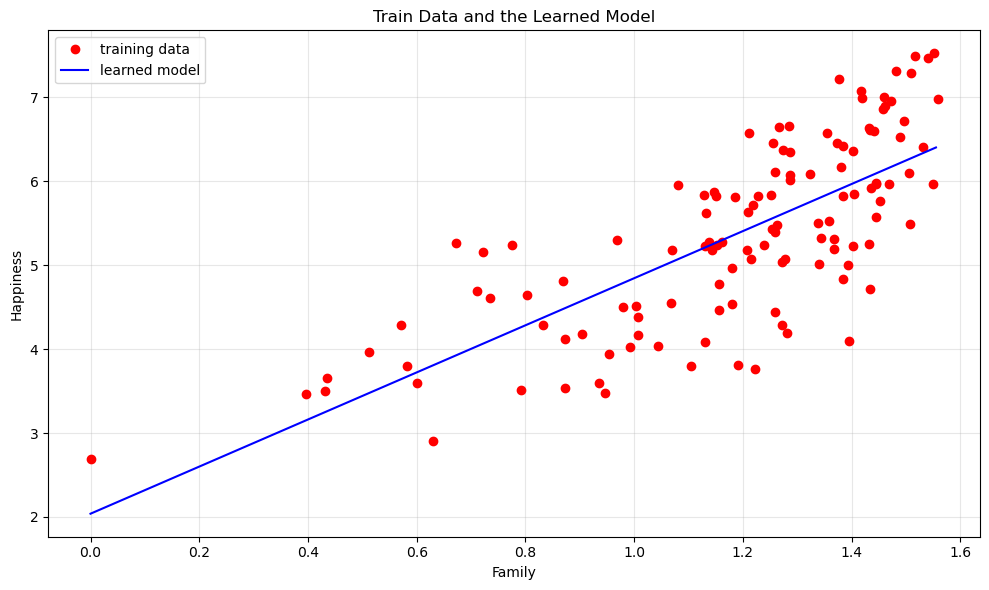

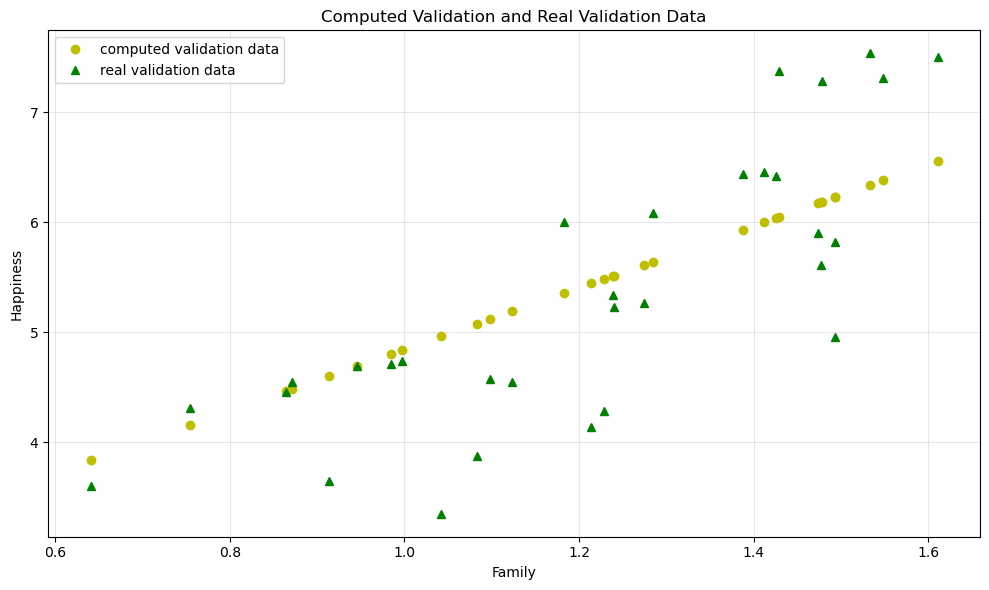

Error:  0.6051231125473606


In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def load_data(file_name, input_var, output_var):
    data = []
    header = []
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                header = row
            else:
                data.append(row)
            line_count += 1
    selected = header.index(input_var)
    inputs = [float(data[i][selected]) if data[i][selected] != '' else np.nan for i in range(len(data))]
    selected_o = header.index(output_var)
    outputs = [float(data[i][selected_o]) if data[i][selected_o] != '' else np.nan for i in range(len(data))]

    df = pd.DataFrame({
        input_var: inputs,
        output_var: outputs
    })

    missing_values = df.isnull().sum()
    if missing_values[input_var] > 0:
        mean_input = df[input_var].mean()
        df[input_var].fillna(mean_input, inplace=True)
    
    if missing_values[output_var] > 0:
        mean_output = df[output_var].mean()
        df[output_var].fillna(mean_output, inplace=True)

    inputs = df[input_var].tolist()
    outputs = df[output_var].tolist()

    return inputs, outputs

def plot_histogram(x, var):
    plt.figure(figsize=(10, 6))
    plt.hist(x, 10)
    plt.title('Histogram of ' + var)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

file = 'data/v3_world-happiness-report-2017.csv'  

inputs_rez, outputs_rez = load_data(file, 'Family', 'Happiness.Score')
print('Rez inputs:  ', inputs_rez[:5])
print('Rez outputs: ', outputs_rez[:5])

plot_histogram(inputs_rez, 'Family')
plot_histogram(outputs_rez, 'Happiness score')

plt.figure(figsize=(10, 6))
plt.plot(inputs_rez, outputs_rez, 'ro')
plt.xlabel('Family')
plt.ylabel('Happiness')
plt.title('Family vs. Happiness')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

np.random.seed(5)  
indexes = [i for i in range(len(inputs_rez))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs_rez)), replace=False)
validationSample = [i for i in indexes if not i in trainSample]

trainInputs = [inputs_rez[i] for i in trainSample]
trainOutputs = [outputs_rez[i] for i in trainSample]
validationInputs = [inputs_rez[i] for i in validationSample]
validationOutputs = [outputs_rez[i] for i in validationSample]

plt.figure(figsize=(10, 6))
plt.plot(trainInputs, trainOutputs, 'ro', label='training data')
plt.plot(validationInputs, validationOutputs, 'g^', label='validation data')
plt.title('Train and Validation Data')
plt.xlabel('Family')
plt.ylabel('Happiness')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

xx = np.array(trainInputs).reshape(-1, 1)
regressor = linear_model.LinearRegression()
regressor.fit(xx, trainOutputs)

w0, w1 = regressor.intercept_, regressor.coef_[0]
print(f'The learned model: f(x) = {w0:.4f} + {w1:.4f} * x')

noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]

plt.figure(figsize=(10, 6))
plt.plot(trainInputs, trainOutputs, 'ro', label='training data')
plt.plot(xref, yref, 'b-', label='learned model')
plt.title('Train Data and the Learned Model')
plt.xlabel('Family')
plt.ylabel('Happiness')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

testPredict = regressor.predict([[x] for x in validationInputs])

plt.figure(figsize=(10, 6))
plt.plot(validationInputs, testPredict, 'yo', label='computed validation data')
plt.plot(validationInputs, validationOutputs, 'g^', label='real validation data')
plt.title('Computed Validation and Real Validation Data')
plt.xlabel('Family')
plt.ylabel('Happiness')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

error = mean_squared_error(validationOutputs, testPredict)
print('Error: ', error)
